In [ ]:
import tensorflow as tf
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import sys

from google.colab import drive
drive.mount("/content/drive", force_remount=True)
data_dir = ("/content/drive/MyDrive/image_stitching_project/")

Mounted at /content/drive


In [ ]:
class Model(tf.keras.Model):
  def __init__(self):
    super(Model, self).__init__()
    self.architecture = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, 3, strides=3, padding="same", name="conv1"),
        tf.keras.layers.Conv2D(64, 3, strides=3, padding="same", name="conv2"),
        tf.keras.layers.Conv2D(128, 7, strides=5, padding="same", name="conv3"),
        tf.keras.layers.Conv2DTranspose(64, 7, strides=(5, 1), padding="same", name="tconv1"),
        tf.keras.layers.Conv2DTranspose(32, 3, strides=3, padding="same", name="tconv2"),
        tf.keras.layers.Conv2DTranspose(3, 3, strides=3, padding="same", name="tconv3", activation="sigmoid")
    ], name="model")
  def call(self, inputs):
    return self.architecture(inputs)

model = Model()
model.build(input_shape=(1, 315, 315, 3))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss="mse")
model.load_weights(data_dir + "checkpoint_1")

valid_example_1.shape: (315, 315, 3)


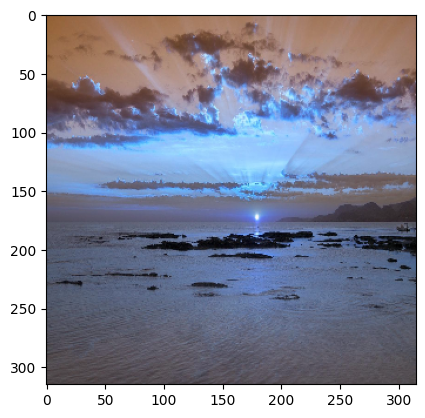

valid_example_2.shape: (315, 315, 3)


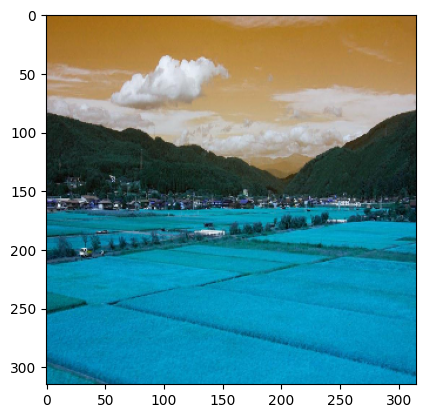

In [ ]:
valid_example_1 = np.load(data_dir + "valid_example_1.npy")
valid_example_2 = np.load(data_dir + "valid_example_2.npy")
print("valid_example_1.shape:", valid_example_1.shape)
plt.imshow(valid_example_1)
plt.show()
print("valid_example_2.shape:", valid_example_2.shape)
plt.imshow(valid_example_2)
plt.show()

In [ ]:
model_input = np.concatenate((cv2.resize(valid_example_1, (126, 315)), np.ones((315, 63, 3)), cv2.resize(valid_example_2, (126, 315))), axis=1)

In [ ]:
print(model_input.shape)
model_pred = model.predict(np.expand_dims(model_input, axis=0))[0, :, :, :]
print(model_pred.shape)

(315, 315, 3)
1/1 [==============================] - 0s 38ms/step
(315, 63, 3)


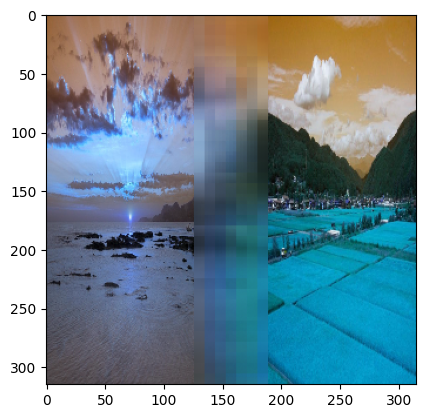

In [ ]:
model_output = np.concatenate((cv2.resize(valid_example_1, (126, 315)), model_pred, cv2.resize(valid_example_2, (126, 315))), axis=1)
plt.imshow(model_output)
plt.show()

In [ ]:
#expl = cv2.resize(np.copy(valid_example), (63, 315))
#np.concatenate((cv2.resize(np.copy(valid_data[i, :, :, :]), (126, 315)), np.ones((315, 63)), cv2.resize(np.copy(valid_data[i+10, :, :, :]), (126, 315))), axis=1)
'''
model_inputs = None
for i in range(5):
  new_input = np.concatenate((cv2.resize(valid_data[i, :, :, :], (126, 315)), np.ones((315, 63, 3)), cv2.resize(valid_data[i+10, :, :, :], (126, 315))), axis=1)
  print("new_input.shape:", new_input.shape)
  if model_inputs is None:
    model_inputs = np.expand_dims(np.copy(new_input), axis=0)
  else:
    model_inputs = np.concatenate((model_inputs, np.expand_dims(np.copy(new_input), axis=0)), axis=0)
print("model_inputs.shape:", model_inputs.shape)
'''

new_input.shape: (315, 315, 3)
new_input.shape: (315, 315, 3)
new_input.shape: (315, 315, 3)
new_input.shape: (315, 315, 3)
new_input.shape: (315, 315, 3)
model_inputs.shape: (5, 315, 315, 3)


In [ ]:
#model_preds = model.predict(model_inputs)
#print(model_preds.shape)

1/1 [==============================] - 0s 252ms/step
(5, 315, 63, 3)


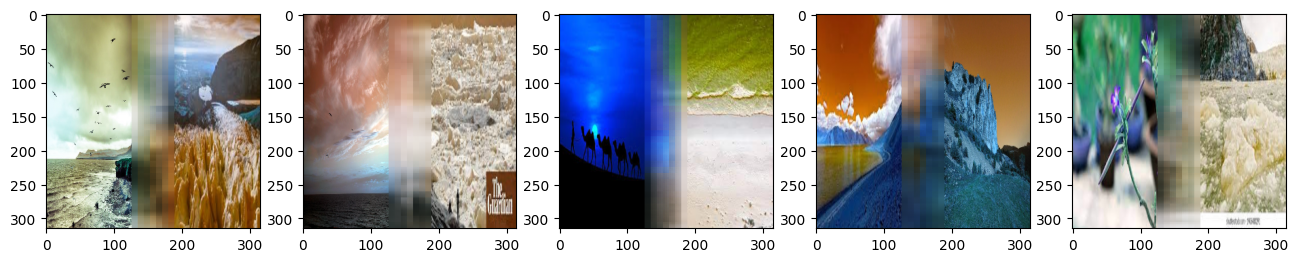

In [ ]:
'''
model_outputs = np.concatenate((model_inputs[:5, :, :126, :], model_preds, model_inputs[:5, :, 189:, :]), axis=2)
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 8))
for i in range(5):
  axes[i].imshow(model_outputs[i, :, :, :])
'''

In [ ]:
conv1_output = model.architecture.get_layer("conv1")(valid_example[None, :, :, :])
conv2_output = model.architecture.get_layer("conv2")(conv1_output)
conv3_output = model.architecture.get_layer("conv3")(conv2_output)
tconv1_output = model.architecture.get_layer("tconv1")(conv3_output)
tconv2_output = model.architecture.get_layer("tconv2")(tconv1_output)
tconv3_output = model.architecture.get_layer("tconv3")(tconv2_output)

In [ ]:
print(valid_example.shape)
print(conv1_output.shape[1:])
print(conv2_output.shape[1:])
print(conv3_output.shape[1:])
print(tconv1_output.shape[1:])
print(tconv2_output.shape[1:])
print(tconv3_output.shape[1:])

(315, 315, 3)
(105, 105, 16)
(35, 35, 64)
(7, 7, 128)
(35, 7, 64)
(105, 21, 32)
(315, 63, 3)


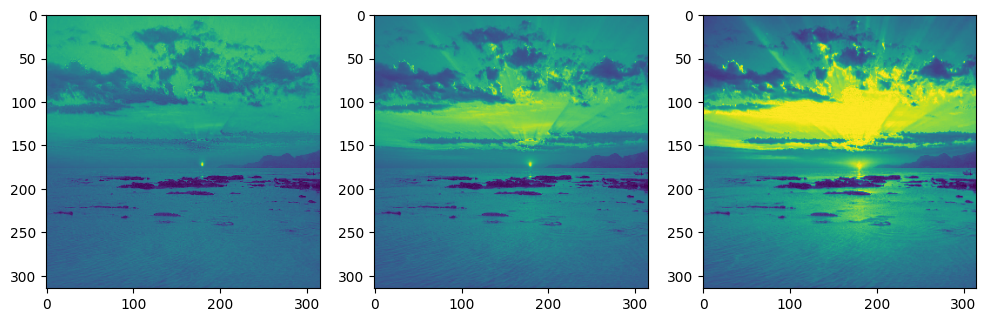

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i in range(3):
  axes[i].imshow(valid_example[:, :, i])

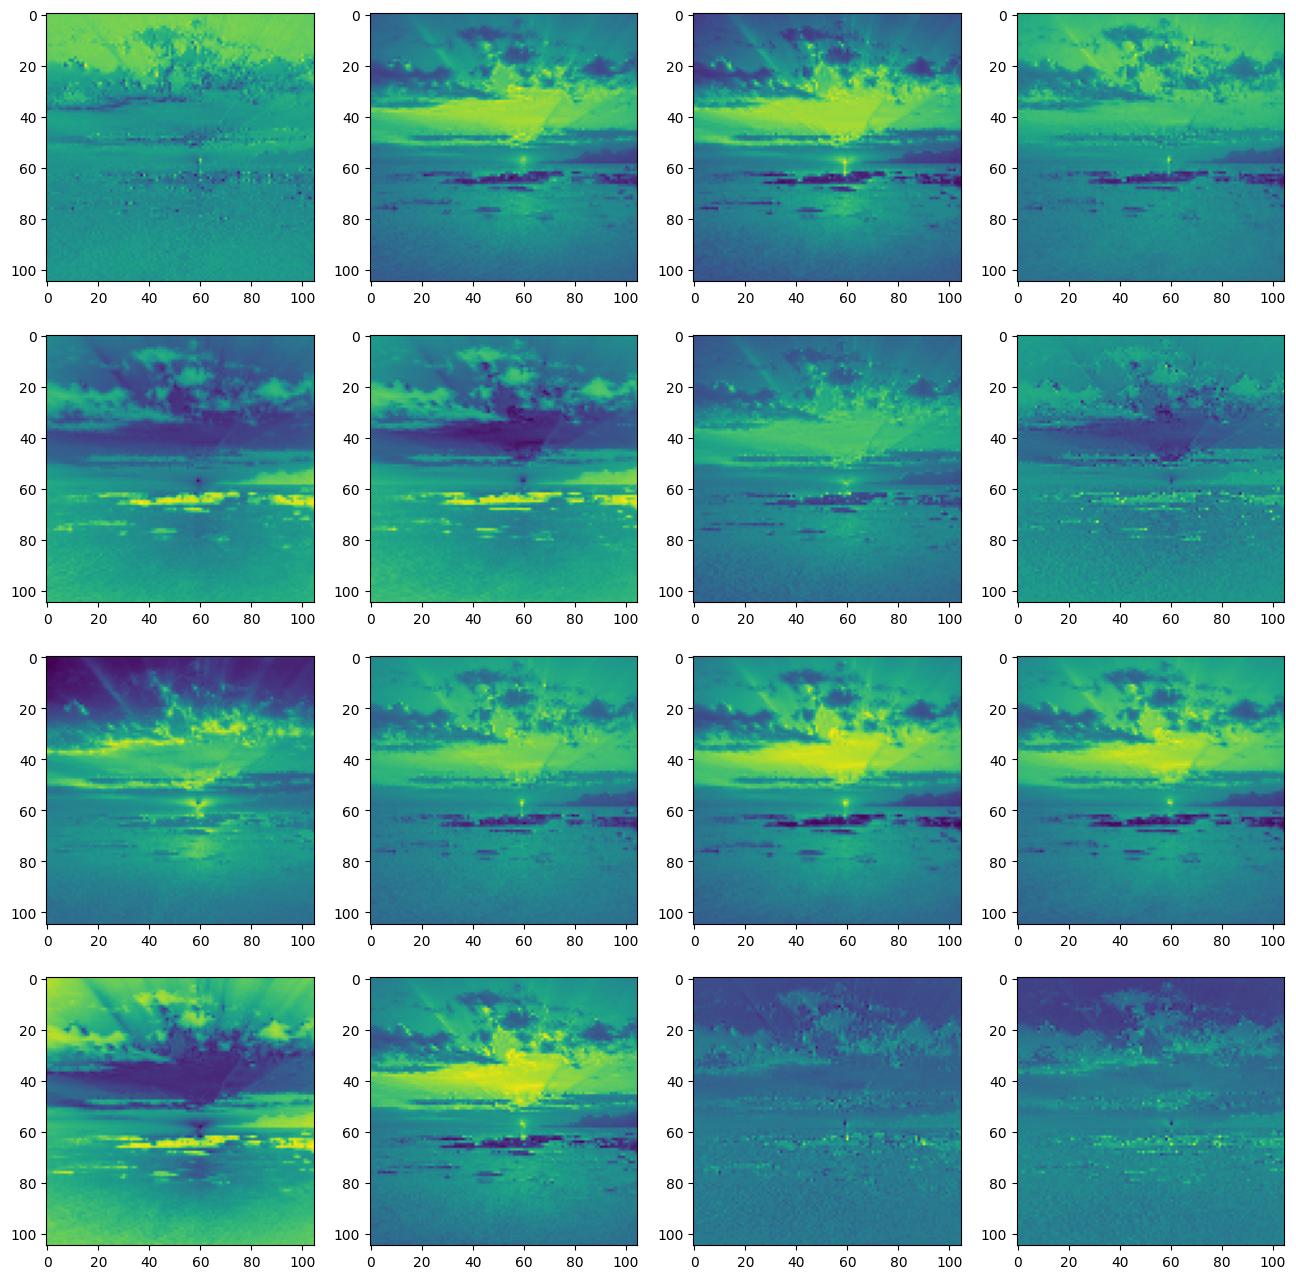

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for i in range(16):
  axes[i//4, i%4].imshow(conv1_output[0, :, :, i])

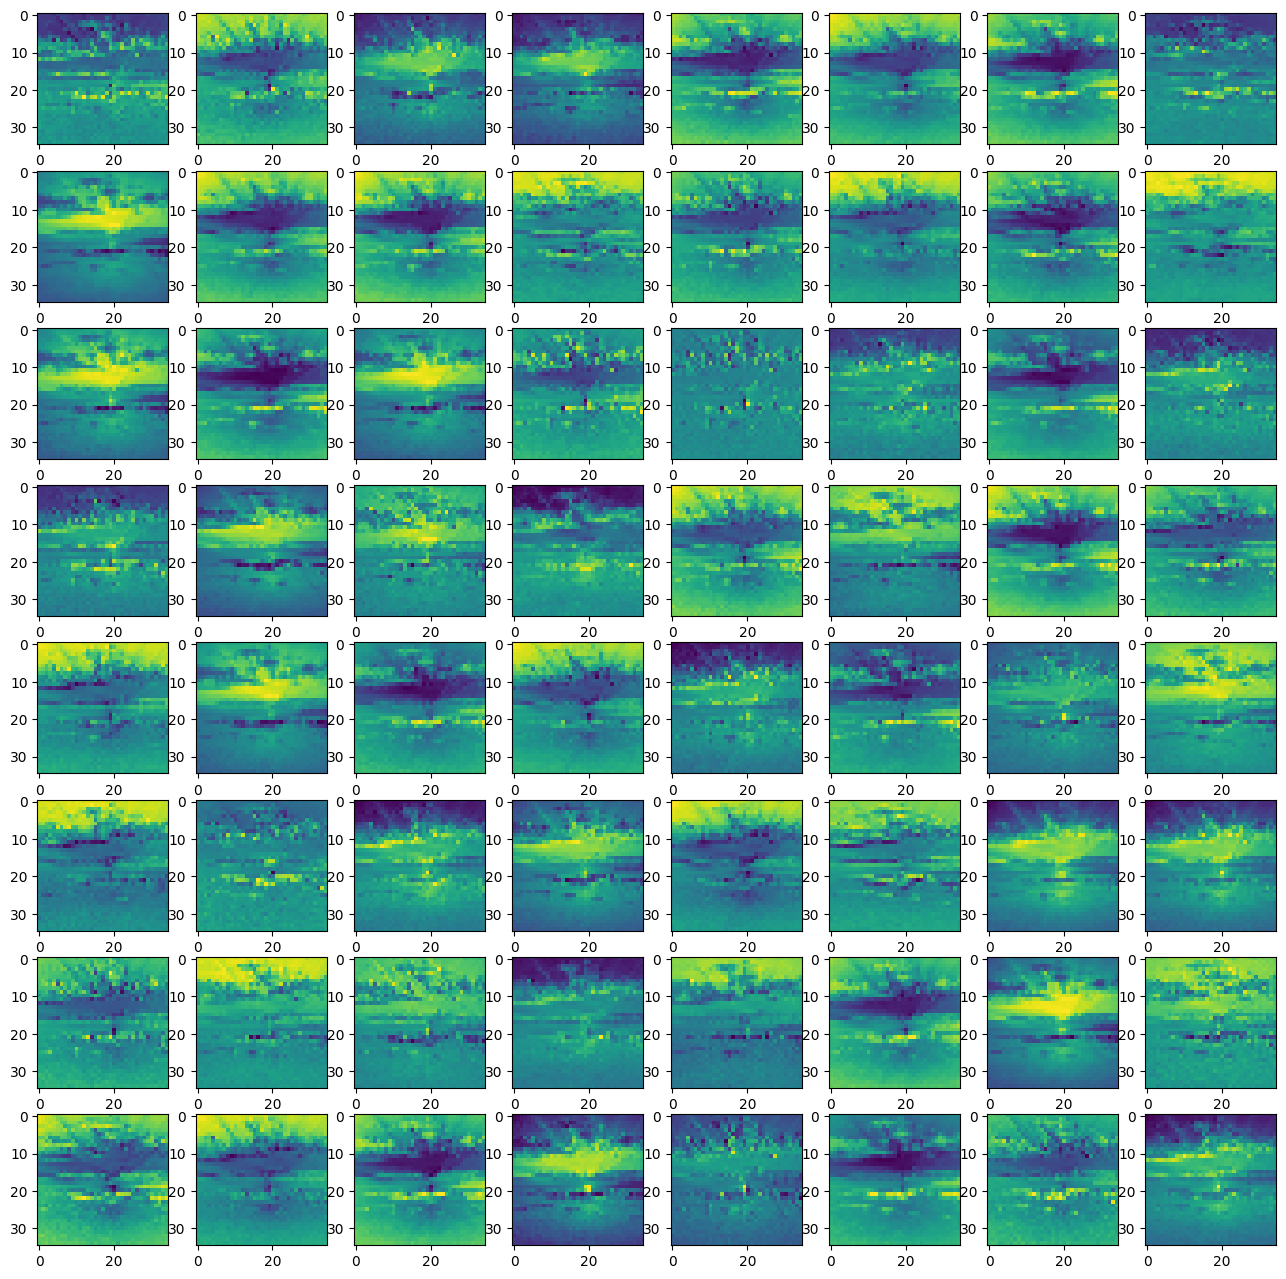

In [ ]:
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(16, 16))
for i in range(64):
  axes[i//8, i%8].imshow(conv2_output[0, :, :, i])